### Problem Statement - is water in this state drinkable or not?

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water_potability.csv')

df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Checking the dimension of the dataframe

In [3]:
df.shape

(3276, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

#### Number of missing values in each column

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Missing values as a %

In [8]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

#### Imputing missing values with mean values based on potability

In [9]:
missing_values = ['ph', 'Sulfate', 'Trihalomethanes']

mv_df = df.groupby('Potability').mean()[missing_values]

# Preserving the order of columns
columns = df.columns

#Setting 'Potability' as index to merge with missing values dataframe using update method, replacing only NaN values
df.set_index('Potability', inplace=True)
df.update(mv_df, overwrite=False)

#Setting the column order to the original one
df = df.reset_index()[columns]

In [30]:
mv_df

,ph,Sulfate,Trihalomethanes
Potability,,,
0,7.085378,334.56429,66.303555
1,7.073783,332.56699,66.539684


Since the mean is almost the same for potable and non-potable water, it might be difficult for the model to predict with high accuracy.

#### Checking for missing values again

In [11]:
df.isnull().mean()*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

### Q.2 is more water potable than less potable?

Not potable(0): 1998
Potable(1): 1278


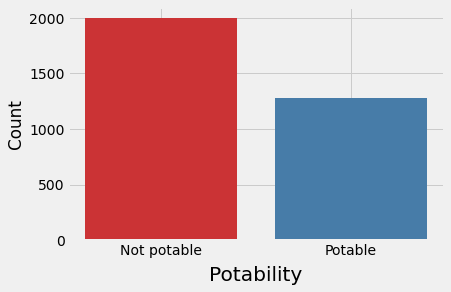

In [12]:
# Target Variable 
xlabels = ['Not potable','Potable']
bar_colors = ['#cb3335', '#477ca8']

plt.style.use('fivethirtyeight')
_ = plt.bar(df.Potability.value_counts().index, df.Potability.value_counts(), tick_label=xlabels, color=bar_colors)

plt.ylabel("Count")
plt.title("Potability", y=-0.2)
            
print('Not potable(0):', df.Potability.value_counts()[0])
print('Potable(1):', df.Potability.value_counts()[1])

In [13]:
# plt.style.available

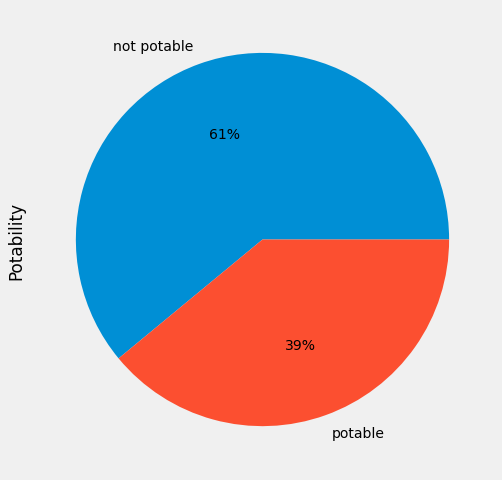

In [14]:
labels=['not potable','potable']
_ = df['Potability'].value_counts().plot(
    kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.1, figsize=(8,8))

Indicates a good spread within the response variable hence no bootstrapping necessary, more water is not potable

#### For easier styling of charts, we will use seaborn for plotting from now onwards

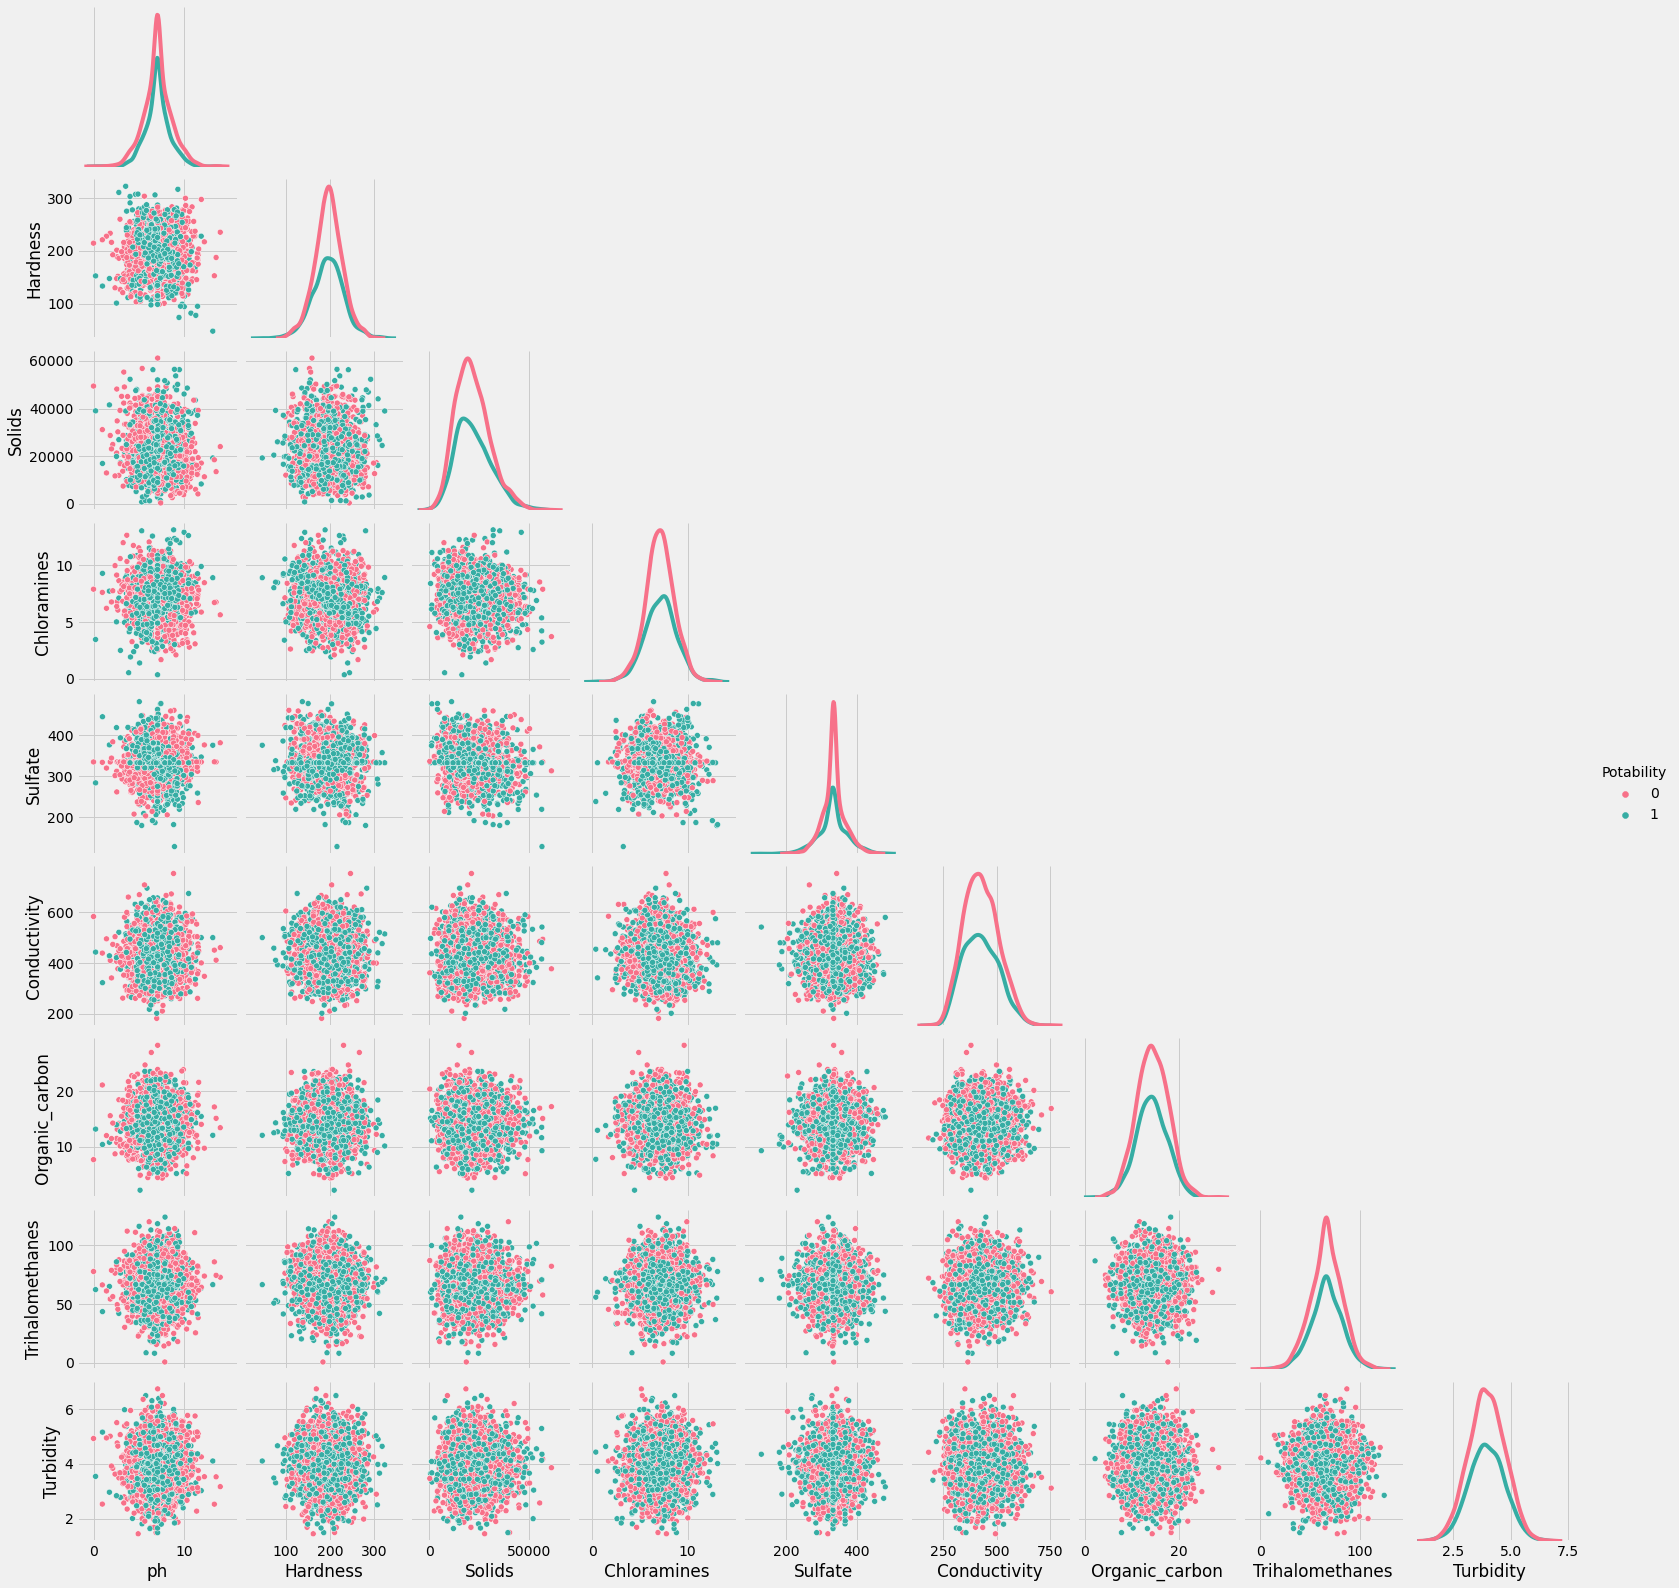

In [15]:
columns = list(df.columns)
sns.set_palette("husl", 2)
_ = sns.pairplot(df[columns], hue='Potability', corner=True, diag_kind='kde', diag_kws={'fill':False})

### Q.3 What are the strong classifiers in deciding potability?

Distributions appear normal.
<br>However it appears to be difficult to classify potability.
<br>Correlations and interactions between variables maybe a deciding factor.

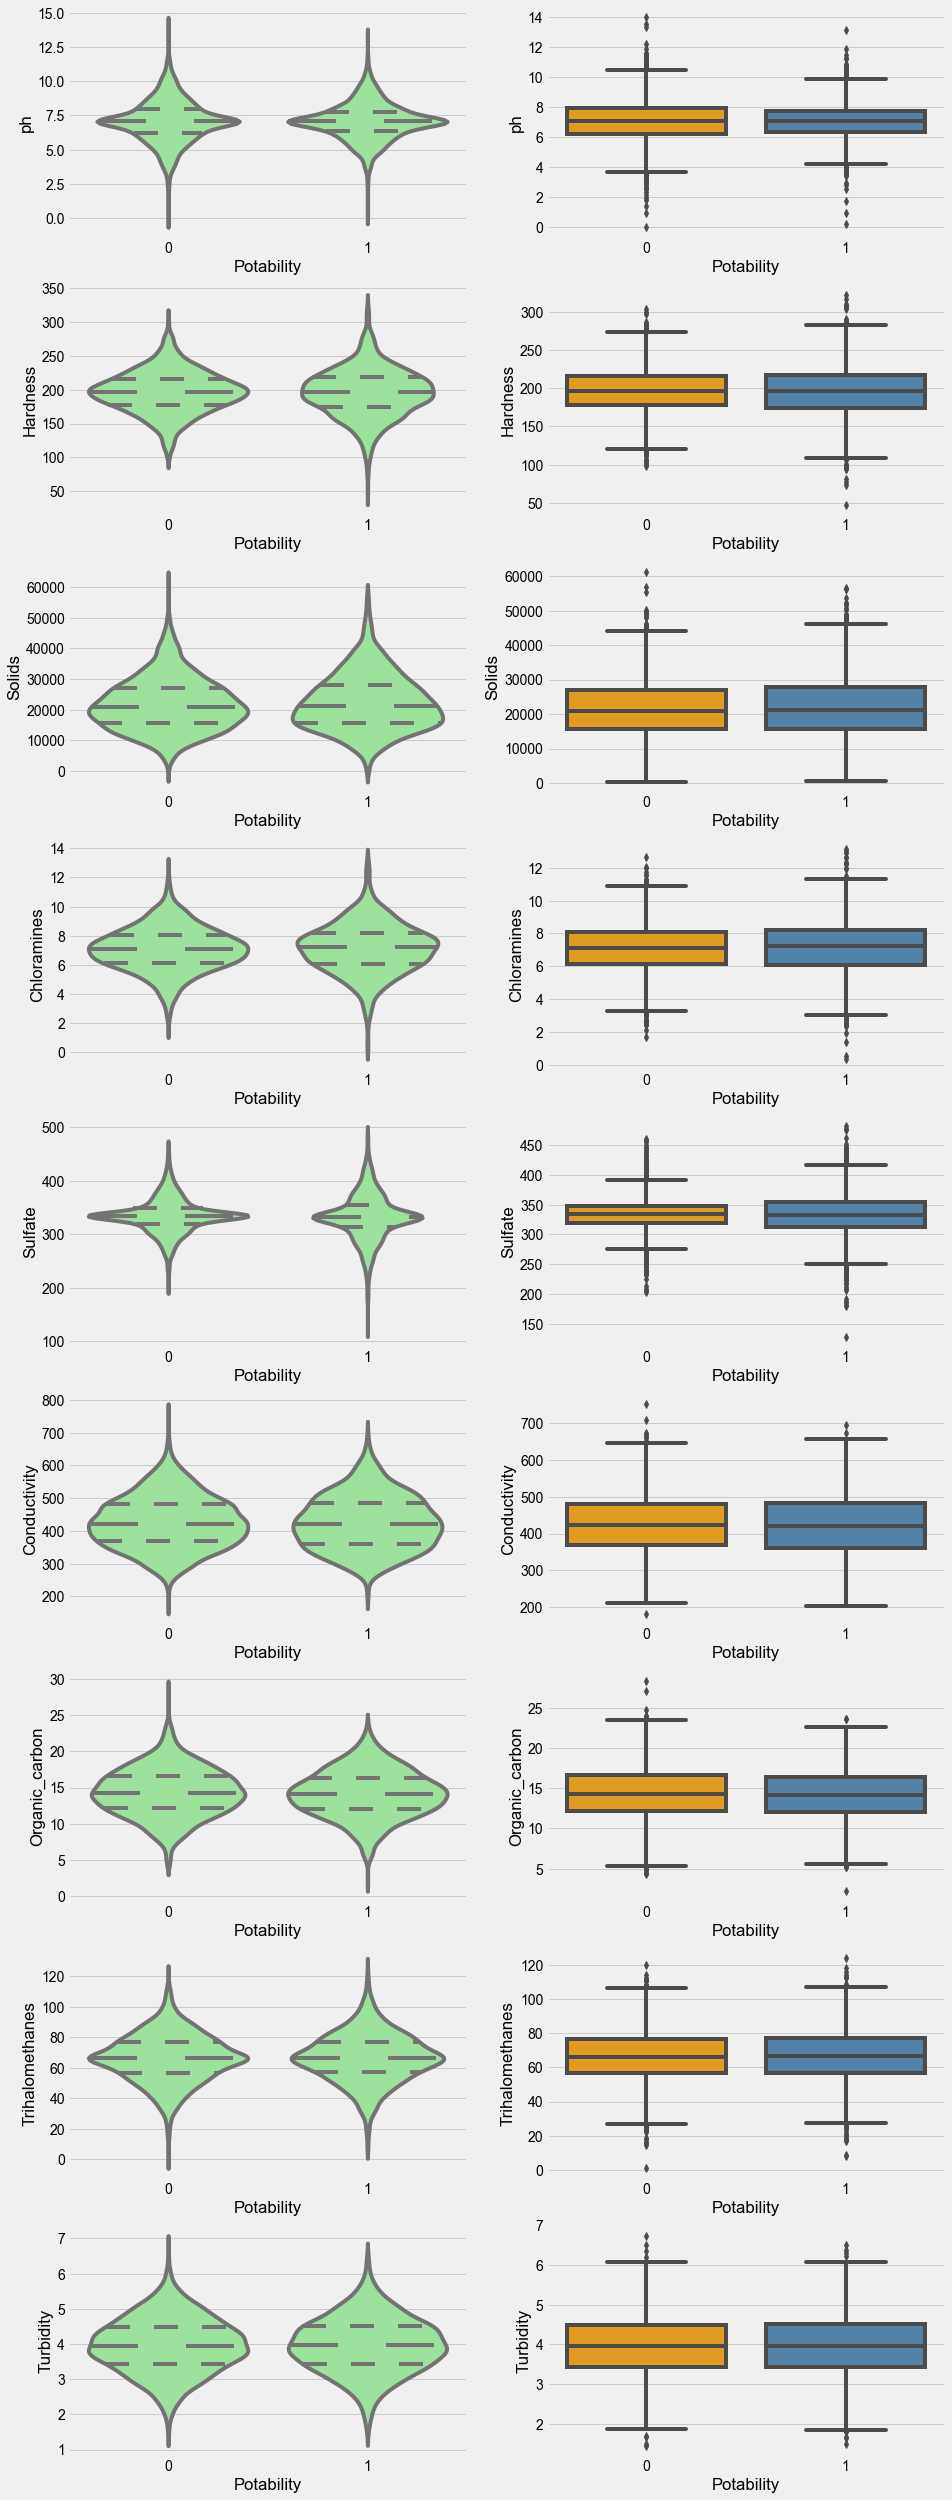

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 42))

features = list(df.columns[:-1])
target = df.columns[-1]
idx = 0

sns.set_style("whitegrid")

for col in features:
    sns.violinplot(data=df, y=col, x=target, ax=ax[idx, 0],
                   inner='quartile', color='lightgreen')
    
    sns.boxplot(data=df, y=col, x=target, ax=ax[idx, 1],
                palette=('orange', 'steelblue'))
    
    idx += 1
plt.show()

Indicates that distribution across variables is similar for potable and non-potable water.
<br>Variance and range appear similar.

This makes it difficult to classify the data in a predictive model.

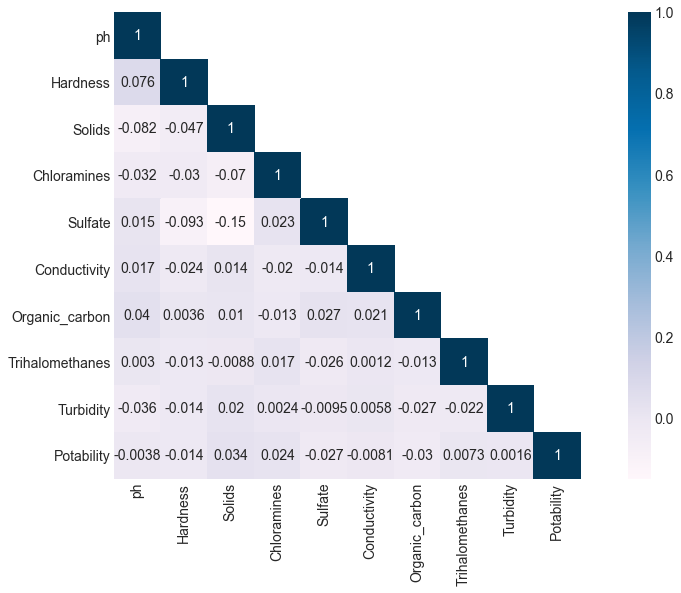

In [17]:
plt.figure(figsize=(15,8))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

for i in range(len(mask)):
    mask[i][i] = False

sns.heatmap(corr, cmap='PuBu', mask=mask, square=True, annot=True)
plt.show()

What is pleasantly surprising here is that there is very low correlation between all features!
<br><br>Considering we only have 9 features, we have decided to take all 9 features to build our model on.

##### Splitting the data into training and test dataset

In [18]:
X = df.drop('Potability',axis=1).values
y = df.Potability.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [20]:
# Feature Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Q.4 Based on the information we have, how well can we predict the potability?

##### Logistic regression

Accuracy score:  0.624618514750763

Confusion Matrix


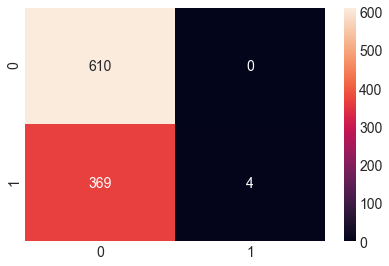

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


ac_lr = accuracy_score(y_test, y_pred)
print("Accuracy score: ", ac_lr )

print("\nConfusion Matrix")
cm_lr = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cm_lr, annot=True, fmt="d") 

Logistic regression performed poorly. <br>The accuracy is very low and there are a large number of false negatives predicted by the model, leading to a type II error.

##### Support Vector Classifier

Accuracy Score:  0.6826042726347915

Confusion Matrix


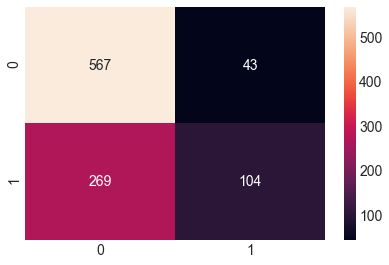

In [22]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

ac_svc = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", ac_svc)

print("\nConfusion Matrix")
cm_svc = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cm_svc, annot=True, fmt="d") 

##### k-Nearest Neighbors

Accuracy score:  0.6358087487283826

Confusion Matrix


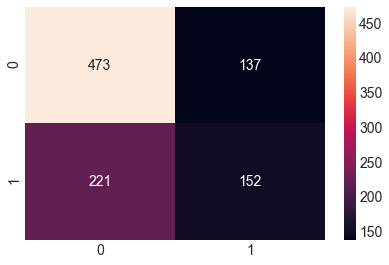

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

ac_knn = accuracy_score(y_test, y_pred)
print("Accuracy score: ", ac_knn)

print("\nConfusion Matrix")
cm_knn = confusion_matrix(y_test, y_pred)

_ = sns.heatmap(cm_knn,annot=True,fmt="d") 

##### Gaussian Naive Bayes

Accuracy Score:  0.6113936927772126

Confusion Matrix


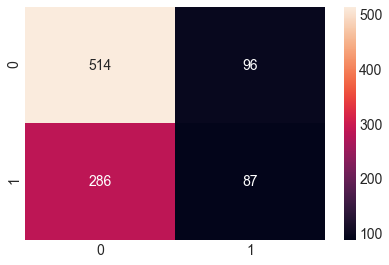

In [24]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

ac_nb = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", ac_nb)

print("\nConfusion Matrix")
cm_nb = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cm_nb, annot=True, fmt="d") 

##### Decision Tree Classifier

Accuracy score:  0.7334689725330621

Confusion Matrix


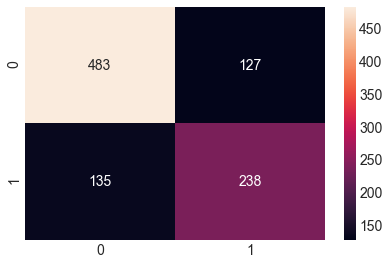

In [25]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

ac_tree = accuracy_score(y_test, y_pred)
print("Accuracy score: ", ac_tree)

print("\nConfusion Matrix")
cm_tree = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cm_tree, annot=True, fmt="d") 

##### Random Forest

Accuracy score:  0.8087487283825026

Confusion Matrix


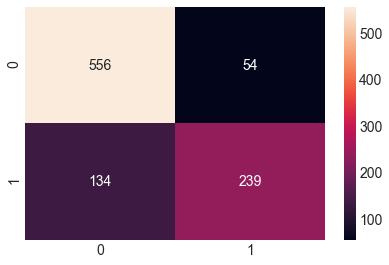

In [26]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

ac_forest = accuracy_score(y_test, y_pred)
print("Accuracy score: ", ac_forest)

print("\nConfusion Matrix")
cm_forest = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cm_forest, annot=True, fmt="d") 

#### Comparing results of all the models

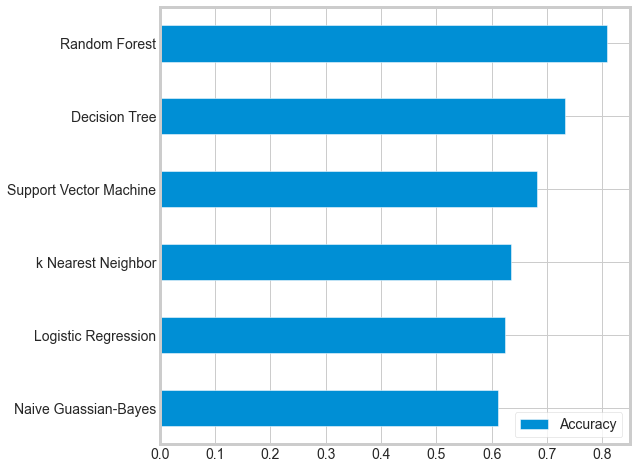

In [27]:
accuracyscores = pd.DataFrame({'Accuracy': [ac_lr,ac_svc,ac_knn,ac_nb,ac_tree,ac_forest]}, 
                              index=['Logistic Regression','Support Vector Machine','k Nearest Neighbor',
                                     'Naive Guassian-Bayes','Decision Tree','Random Forest']
                            ).sort_values(by='Accuracy', ascending=True)
_ = accuracyscores.plot(kind='barh', figsize=(7.5,7.5), color="#008fd5")

Out of all the models used so far, Random Forest Classifier has given the best accuracy score. <br>Let's check which features are most important in defining the outcome.

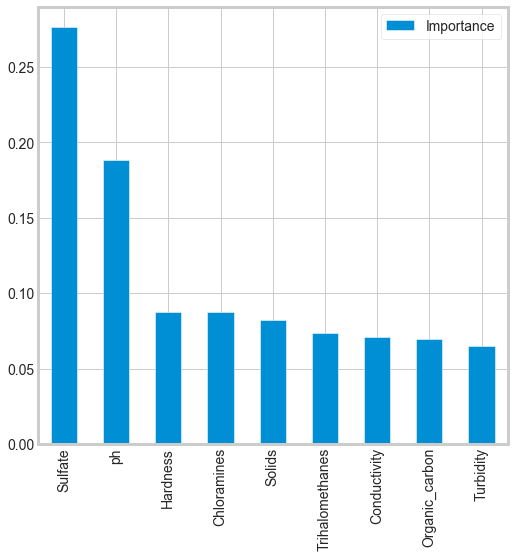

In [28]:
FeatureImportance = pd.DataFrame({'Importance': forest.feature_importances_}, 
                                 index=columns[:-1]).sort_values(by='Importance', ascending=False)

_ = FeatureImportance.plot(kind='bar', figsize=(7.5,7.5), color="#008fd5")

While Random Forest may have the highest prediction accuracy, we should not ignore the fact that decision tree model because has a lower type 1 error.

As we are trying to predict if water is drinkable or not, we are more sensitive to type 1 errors. Type 2 errors can be mitigated by sending them back to the purification process however with type 1 errors we cannot afford to risk the health of the citizens of the state.

##### FURTHER QUESTIONS TO BE ANSWERED

What can we do to improve our predictions?
- We can create a larger sample and or consider more variables
- We can use Hyperparameter Tuning for improving results
- We may consider using ANN for predictions